# Advent of Code 2025


# Puzzle - part 1

**--- Day 7: Laboratories ---**

You thank the cephalopods for the help and exit the trash compactor,
finding yourself in the [familiar](!https://adventofcode.com/2024/day/6) [halls](!https://adventofcode.com/2018/day/4) of a North Pole research wing.

Based on the large sign that says "teleporter hub",\
they seem to be researching **teleportation**;\
you can't help but try it for yourself and step onto the large yellow teleporter pad.

Suddenly, you find yourself in an unfamiliar room!\
The room has no doors; the only way out is the teleporter.\
Unfortunately, the teleporter seems to be leaking [magic smoke](!https://en.wikipedia.org/wiki/Magic_smoke).

Since this is a teleporter lab, there are lots of spare parts, manuals, and diagnostic equipment lying around.\
After connecting one of the diagnostic tools, it helpfully displays error code `0H-N0`,\
which apparently means that there's an issue with one of the **tachyon manifolds**.

You quickly locate a diagram of the tachyon manifold (your puzzle input).\
A tachyon beam enters the manifold at the location marked `S`; tachyon beams always move **downward**.\
Tachyon beams pass freely through empty space (`.`). However, if a tachyon beam encounters a splitter (`^`),\
the beam is stopped; instead, a new tachyon beam continues from the immediate left and from the immediate right of the splitter.

For example:
```
.......S.......
...............
.......^.......
...............
......^.^......
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............
```
In this example, the incoming tachyon beam (`|`) extends downward from `S` until it reaches the first splitter:
```
.......S.......
.......|.......
.......^.......
...............
......^.^......
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............
```
At that point, the original beam stops, and two new beams are emitted from the splitter:
```
.......S.......
.......|.......
......|^|......
...............
......^.^......
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............
```
Those beams continue downward until they reach more splitters:
```
.......S.......
.......|.......
......|^|......
......|.|......
......^.^......
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............
```
At this point, the two splitters create a total of only **three** tachyon beams,\
since they are both dumping tachyons into the same place between them:
```
.......S.......
.......|.......
......|^|......
......|.|......
.....|^|^|.....
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............
```
This process continues until all of the tachyon beams reach a splitter or exit the manifold:
```
.......S.......
.......|.......
......|^|......
......|.|......
.....|^|^|.....
.....|.|.|.....
....|^|^|^|....
....|.|.|.|....
...|^|^|||^|...
...|.|.|||.|...
..|^|^|||^|^|..
..|.|.|||.|.|..
.|^|||^||.||^|.
.|.|||.||.||.|.
|^|^|^|^|^|||^|
|.|.|.|.|.|||.|
```

To repair the teleporter, you first need to understand the beam-splitting properties of the tachyon manifold.\
In this example, a tachyon beam is split a total of `21` times.

**Analyze your manifold diagram. How many times will the beam be split?**

## Input

In [61]:
from pprint import pprint

# Load the input file

with open('input - Day 7.txt', 'r') as file:
    file_lines = file.readlines()

diagram = [line.strip() for line in file_lines]

pprint(diagram[:11])

['......................................................................S......................................................................',
 '.............................................................................................................................................',
 '......................................................................^......................................................................',
 '.............................................................................................................................................',
 '.....................................................................^.^.....................................................................',
 '.............................................................................................................................................',
 '....................................................................^.^.^.................................................

In [62]:
diagram_grid = [list(line) for line in diagram]
print(diagram_grid[0][60:80])

['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', 'S', '.', '.', '.', '.', '.', '.', '.', '.', '.']


## Solution

Right so we will just iterate row by row.\

As we iterate we check symbols above,\
no point processing anything unless there is either `S` or `|` above it to activate our current symbol.

If our **active** condition is met we check our current symbol.\
If it's a `^` we change its horizontal neighbours to `|` (split).\
If it's anything else (`.`) we change the current symbol to `|`

Each time we split we count it.

In [63]:
count_splits = 0

for row_idx, line in enumerate(diagram_grid):

    if row_idx == 0:
        continue

    for x_position, symbol in enumerate(line):

        symbol_above = diagram_grid[row_idx - 1][x_position]
        if symbol_above in ["S", "|"]:

            if symbol == "^":
                diagram_grid[row_idx][x_position - 1] = "|"
                diagram_grid[row_idx][x_position + 1] = "|"
                count_splits += 1

            else:
                diagram_grid[row_idx][x_position] = "|"

In [64]:
print(f"There is a total of {count_splits} splits in the manifold diagram")
# 1566

There is a total of 1566 splits in the manifold diagram


# Puzzle - part 2

**--- Part Two ---**

With your analysis of the manifold complete, you begin fixing the teleporter.\
However, as you open the side of the teleporter to replace the broken manifold,\
you are surprised to discover that it isn't a classical tachyon manifold - it's a **quantum tachyon manifold**.

With a quantum tachyon manifold, only a **single tachyon particle** is sent through the manifold.\
A tachyon particle takes **both** the left and right path of each splitter encountered.

Since this is impossible, the manual recommends the many-worlds interpretation of quantum tachyon splitting:\
each time a particle reaches a splitter, it's actually **time itself** which splits.\
In one timeline, the particle went left, and in the other timeline, the particle went right.

To fix the manifold, what you really need to know is the **number of timelines** active\
after a single particle completes all of its possible journeys through the manifold.

In the above example, there are many timelines.\
For instance, there's the timeline where the particle always went left:
```
.......S.......
.......|.......
......|^.......
......|........
.....|^.^......
.....|.........
....|^.^.^.....
....|..........
...|^.^...^....
...|...........
..|^.^...^.^...
..|............
.|^...^.....^..
.|.............
|^.^.^.^.^...^.
|..............
```
Or, there's the timeline where the particle alternated going left and right at each splitter:
```
.......S.......
.......|.......
......|^.......
......|........
......^|^......
.......|.......
.....^|^.^.....
......|........
....^.^|..^....
.......|.......
...^.^.|.^.^...
.......|.......
..^...^|....^..
.......|.......
.^.^.^|^.^...^.
......|........
```
Or, there's the timeline where the particle ends up at the same point as the alternating timeline, but takes a totally different path to get there:
```
.......S.......
.......|.......
......|^.......
......|........
.....|^.^......
.....|.........
....|^.^.^.....
....|..........
....^|^...^....
.....|.........
...^.^|..^.^...
......|........
..^..|^.....^..
.....|.........
.^.^.^|^.^...^.
......|........
```
In this example, in total, the particle ends up on `40` different timelines.

Apply the many-worlds interpretation of quantum tachyon splitting to your manifold diagram.
**In total, how many different timelines would a single tachyon particle end up on?**

## Solution

Okay this is a bit tricky.\
First let us have a look at our new diagram that we made above.

In [65]:
[pprint("".join(line[30:-30])) for line in diagram_grid[:30]];

'........................................S........................................'
'........................................|........................................'
'.......................................|^|.......................................'
'.......................................|.|.......................................'
'......................................|^|^|......................................'
'......................................|.|.|......................................'
'.....................................|^|^|^|.....................................'
'.....................................|.|.|.|.....................................'
'....................................|^|^|^|^|....................................'
'....................................|.|.|.|.|....................................'
'...................................|^|||^|||^|...................................'
'...................................|.|||.|||.|.............................

Okay so let's focus on the first few lines for now, they are the easiest one's to deal with.
```
............S.............
............|.............
...........|^|............
...........|.|............
..........|^|^|...........
..........|.|.|...........
.........|^|^|^|..........
.........|.|.|.|..........
........|^|^|^|^|.........
........|.|.|.|.|.........
```
For the sake of this explanation let's ignore the filler rows like this `..|.|.|.|..` they don't affect the path.
```
............S.............
...........|^|............
..........|^|^|...........
.........|^|^|^|..........
........|^|^|^|^|.........
```
Now let's count the paths by hand
```
............1.............
...........1^1............ (2 paths total)
..........|^|^|...........
.........|^|^|^|..........
........|^|^|^|^|.........
```
```
............S.............
...........1^1............
..........1^2^1........... (4 paths total)
.........|^|^|^|..........
........|^|^|^|^|.........
```
```
............S.............
...........1^1............
..........1^2^1...........
.........1^3^3^1.......... (8 paths total)
........|^|^|^|^|.........
```
```
............S.............
...........1^1............
..........1^2^1...........
.........1^3^3^1..........
........1^4^6^4^1......... (16 paths total)
```
Doesn't this look familiar?

![image](https://www.mathsisfun.com/numbers/images/pascals-triangle-add.svg)

It's a **Pascal's Triangle**.\
Well at least in the simple scenario where the splitters form a perfect triangular structure.\
But what about something less clean, like this?
```
...|.|.|.|.|.....
..|^|||^|||^|....
```
The idea is still simple.\
First, we treat every `.` as a `0`, since those cells don’t contribute any paths.
Then we iterate over the diagram row by row, from top to bottom.

For each `|` that we _“step on”_, we **always add** the value from **directly above** it.

Next, we look at the cells immediately to the left and right:
- If there is a `^` to the right, we **add** the number from the row above, **diagonally right**.
- If there is a `^` to the left, we **add** the number from the row above, **diagonally left**.

Note that since we iterate from top to bottom, each row above will always be fully compute when we use it.\
But we have to swap the `S` for `1` ourselves before we begin.

The total number of all paths will be the sum of the last row.

![image](https://www.mathsisfun.com/numbers/images/pascals-triangle-doubles.svg)
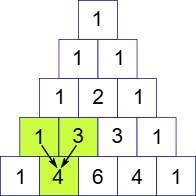
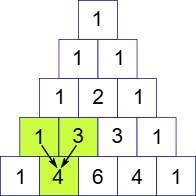

In [66]:
# Change all the dots to zeros and the S to 1
path_grid = []

for line in diagram_grid:
    new_line = []

    for symbol in line:

        if symbol == ".":
            new_line += ["0"]

        elif symbol == "S":
            new_line += ["1"]

        else:
            new_line.append(symbol)

    path_grid.append(new_line)

assert len(path_grid[0]) == len(diagram_grid[0])
assert len(path_grid) == len(diagram_grid)

In [67]:
[pprint("".join(line[30:-30])) for line in path_grid[:30]];

'000000000000000000000000000000000000000010000000000000000000000000000000000000000'
'0000000000000000000000000000000000000000|0000000000000000000000000000000000000000'
'000000000000000000000000000000000000000|^|000000000000000000000000000000000000000'
'000000000000000000000000000000000000000|0|000000000000000000000000000000000000000'
'00000000000000000000000000000000000000|^|^|00000000000000000000000000000000000000'
'00000000000000000000000000000000000000|0|0|00000000000000000000000000000000000000'
'0000000000000000000000000000000000000|^|^|^|0000000000000000000000000000000000000'
'0000000000000000000000000000000000000|0|0|0|0000000000000000000000000000000000000'
'000000000000000000000000000000000000|^|^|^|^|000000000000000000000000000000000000'
'000000000000000000000000000000000000|0|0|0|0|000000000000000000000000000000000000'
'00000000000000000000000000000000000|^|||^|||^|00000000000000000000000000000000000'
'00000000000000000000000000000000000|0|||0|||0|00000000000000000000000000000

In [68]:
# "Pascal's Triangle"
path_counter = 0


for row_idx, line in enumerate(path_grid):

    if row_idx == 0:
        continue


    for x_position, symbol in enumerate(line):

        symbol_paths = 0

        if symbol == "|":
            # Add above
            symbol_paths += int(path_grid[row_idx - 1][x_position])

            # if "^" to the right
            if x_position < len(line)-1 and line[x_position + 1] == "^":
                symbol_paths += int(path_grid[row_idx - 1][x_position + 1])

            # if "^" to the left
            if x_position > 0 and line[x_position - 1] == "^":
                symbol_paths += int(path_grid[row_idx - 1][x_position - 1])

            path_grid[row_idx][x_position] = str(symbol_paths)

In [69]:
[pprint("".join(line[30:-30])) for line in path_grid[:30]];

'000000000000000000000000000000000000000010000000000000000000000000000000000000000'
'000000000000000000000000000000000000000010000000000000000000000000000000000000000'
'0000000000000000000000000000000000000001^1000000000000000000000000000000000000000'
'000000000000000000000000000000000000000101000000000000000000000000000000000000000'
'000000000000000000000000000000000000001^2^100000000000000000000000000000000000000'
'000000000000000000000000000000000000001020100000000000000000000000000000000000000'
'00000000000000000000000000000000000001^3^3^10000000000000000000000000000000000000'
'000000000000000000000000000000000000010303010000000000000000000000000000000000000'
'0000000000000000000000000000000000001^4^6^4^1000000000000000000000000000000000000'
'000000000000000000000000000000000000104060401000000000000000000000000000000000000'
'000000000000000000000000000000000001^146^641^100000000000000000000000000000000000'
'000000000000000000000000000000000001014606410100000000000000000000000000000

In [70]:
timelines_count = sum([int(s) for s in path_grid[-1]])

print(f"There are {timelines_count} possible timelines")
# 5921061943075

There are 5921061943075 possible timelines
